<a href="https://colab.research.google.com/github/cschung7/2025-class-PHD/blob/main/AFML_Chap3_Labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labeling

- In unsupervised learning, need label

   1. fixed time horizon    
   2. dynamic thresholds
   3. triple barrier method
   4. Learning side and size
   5. meta-labeling and its usuage
   6. quantamental way
   7. dropping unnecessary labels


[See ConfusionMatrix](http://localhost:8888/lab/tree/python/FinancialEngineering/Working/(R)ConfusionMatrix.ipynb)

### Fixed time horizon method

- sticking to time of touching threshols,   commonly used ML
- $y_i \in \{-1, 0,  1\}$
$$
\begin{align*}
   y_i =
    \begin{cases}
    -1 & r_{t_{i, 0}, t_{i, 0}+h} < \tau\\
     0 & |r_{t_{i, 0}, t_{i, 0}+h}| \le \tau \\
     1 &  r_{t_{i, 0}, t_{i, 0}+h} > \tau
    \end{cases}
\end{align*}
$$
  - where     
     - $\tau$: pre-defined threshold
     - $t_{i, 0}$: time index right after event $X_i$ takes place
     - $t_{i, 0}+h$:  time index of the $h^{th}$ bar after $t_{i, 0}$
     - $r_{t_{i, 0}, t_{i, 0}+h}$ : price return over the indexed horizon    
     

 - However, time bars do not  exhibit statistically good properties, , such as, normality.

### Computing dynamic thresholds and volume (dollar) bars
 **$\Longrightarrow$ profit taking or stop loss for a bet**

1. modeling threshold depending on volatility
  -  to use pandas ewm (exponentially weighted moving average) standard deviation     
2. using volume (dollar) bars :
  - close to normal    
3. to model dynamic path followed by prices
  - dynamic trading strategy sense

#### 1. Dynamic threshold

> **def**  $\texttt{getDailyVol(close,span0=100)}$  <br/>
>> **return**: $\texttt{return.ewm(span).std}$

#### 2. Labeling method: Triple-barrier method

- two horizontal barrier: profit(+1), stop-loss(-1)
- vertical barrier: how many lapse pass after taking position: _sign(return)  or 0_

>**def** $\texttt{applyPtSlOnT1(close,events,ptSl,molecule):}$
>> **return**: out: #pd.DataFrame in barrier touch timestamp

- **configurations** on PtSl =[pt, sl, t1]
  1. [1,1,1]: standard way of operation
     - to take profit with stop loss and fixed holding period
  2. [0,1,1]: holding till t1 if stop loss not happen
  3. [1,1,0]: pursuing profit as long as not stopped out: _unrealistic_
  4. less realistic: [0, 0, 1], [1,0, 1], [1,0, 0]
      - [1,0, 0]: unintentional long run investment!!


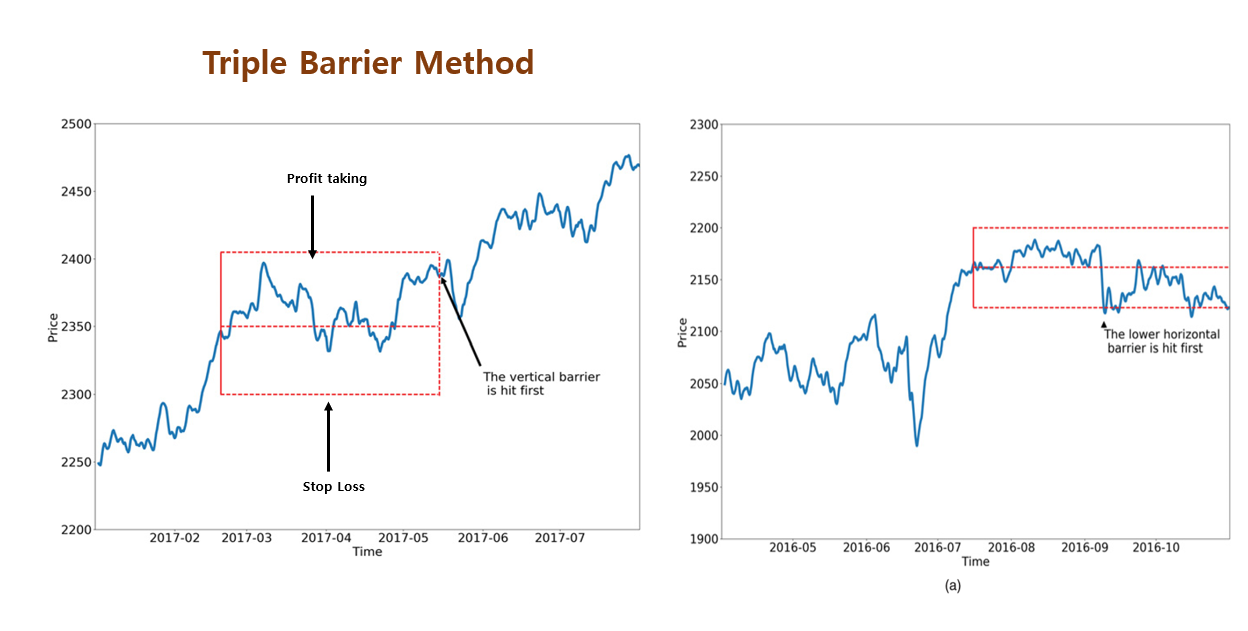

In [ ]:
from IPython.display import Image
Image("/mnt/c/python/images/TripleBarrierAll.png", height=900, width=900)

**Three useful configurations on ptsl**

1. [1,1,1]:
   - This is the standard setup, where we define three barrier exit
   - profit taking, however, max tolerance for loss and holding period
2. [0, 1,1]:
  - exit after a number of bars if not stopped out
3. [1,1,0]:
  - unrealistic

### Learning size and side
- cuSum filter timestamp: $\texttt{tEvent}$
- adding vertical barrier:
- getting the time of first touch: $\texttt{getEvents}$
  - multiprocessing: $\texttt{mpPandasObj}$
    - apply $\texttt{applyPtSlOnT1}$. That is, get the earliest barrier touching timestamp
- labeling side and size: $\texttt{getBins}$

**first time touch**

>$\texttt{def: getEvents}$
>>$\texttt{events=pd.concat({'t1':t1,'trgt':trgt,'side':side\_},axis=1).dropna(subset=['trgt'])}$

**Labeling side and size**

>$\texttt{def: getBins}$
>>$\texttt{out = pd.DataFrame({'ret', 'bin'})}$

- ret: The return realized at the time of the first touched barrier.
- bin: The label, {−1,0,1} = $\texttt{np.sign(ret)}$

### Meta-labeling

- a framework where we can apply ML to determine size of betting
- [1st model: side] <br/>
   $\Longrightarrow$ $\texttt{tripleBarrier}$ <br/>
   $\Longrightarrow  \texttt{getBins; bins={0,1}}$: **2nd labeling**  <br/>
   $\Longrightarrow$: ML decide to take or not to take bet with probability <br/>
   $\Longrightarrow$: the probability can be used for betting size

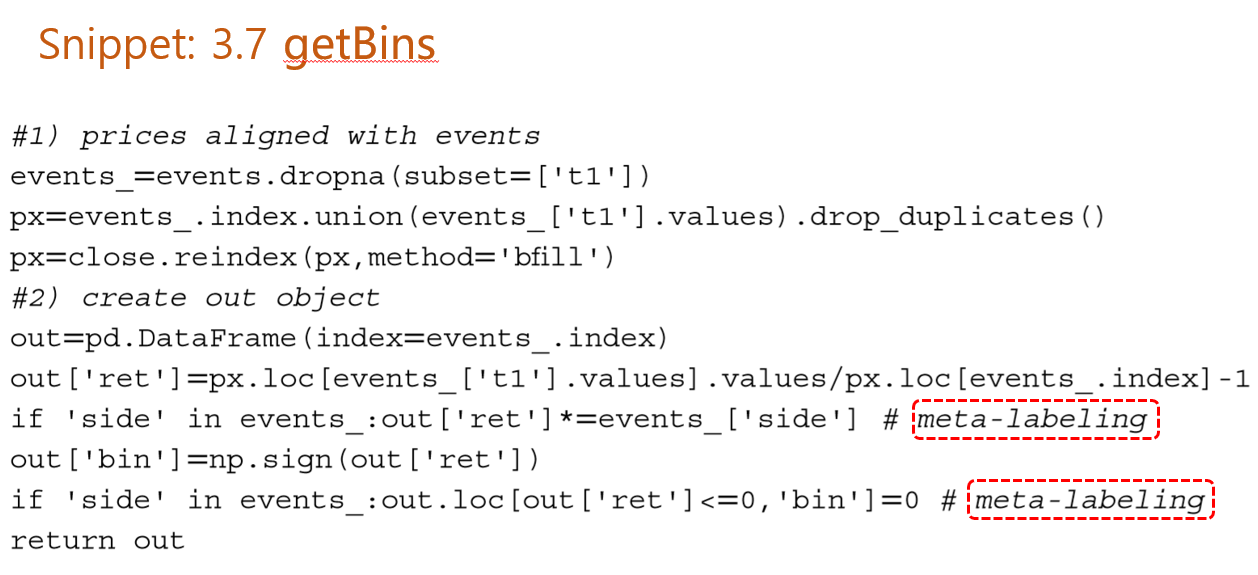

In [ ]:
from IPython.display import Image
Image("/mnt/c/python/images/getBins.PNG", height=900, width=600)

**Exercise 3.4**
Develop a trend-following strategy based on a popular technical analysis statistic    
      (e.g.,crossing moving averages). For each observation,the model suggests a side, but not a size of the bet. <br/>
(a) Derive meta-labels for ptSl=[1,2] and t1 where numDays=1. Use as $\texttt{trgt}$ the daily standard deviation as computed by Snippet 3.1. <br/>
(b) Train a random forest to decide whether to trade or not. Note: The decision is whether to trade or not, {0,1}, since the underlying model (the crossing moving average) has decided the side,{−1,1}.

> 1. 1st model:
>>crossOver(MA(20), MA(60)):Long <br>
crossDown(MA(20), MA(60)): Short

> 2. Turn on 2nd model: TripleBarrier and recording returns and classifying them as {0,1}
> 3. Decide trading or not with 2nd model
> 4. Find P(trading) and use it as a reference for betting size

**Questions**

1. What are the candidate models for the 1st model?
2. How to train 2,3?
3. What are the candidate feature variables?

### How to use meta labeling?

- you may know confusion matrix?
- recall? precision? F1-score? accuracy? <br/>
 score =$2 \cdot \frac{\text{recall}\times \text{precision}}{\text{recall}+ \text{precision}}$

- **Meta-labeling is particularly helpful to achieve higher F1-scores**
  1. Build a model that achieves high recall, even if the precision is not    
     particularly high.
  2. Improve low precision by applying meta-labeling to the positives predicted<br>
     by the primary model
      - "the role of the secondary ML algorithm is to determine whether<br>
         a positive from the primary (exogenous) model is true or false."
      - "It is not its purpose to come up with a betting opportunity.    
         Its purpose is to determine whether we should act or    
         pass on the opportunity that has been presented"

**- Meta labeling is helping to overcome ML's shortcomings**
  1. ML decide not size, but side: overfitting or black box problem
  2. You may use asymmetric feature variables for sophiscated buy/sell strategy
  3. Independent betting size will save you over betting under downturn

### dropping unnecessary labeling

- to correct the problem of under performing ML algo with very deep unbalanced classifications

## Meta Labeling in MNist Data
[See Here](https://www.quantopian.com/posts/meta-labeling-advances-in-financial-machine-learning-ch-3-pg-50)

- first train model
- select threshold using ROC     
    - $\texttt{FPR, TPR, threshold} =\texttt\{sklearn.sk\_metrics.roc\}\_\texttt{curve(y}, \hat{y}$
- make categorical data of prediction

## Exercise
- Chapter 3's exercises seem to be workable

## Note

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import yfinance as yf

In [ ]:
#ori = yf.download('AAPL', start='2010-01-01')
data = ori.copy()
data = data[['Adj Close']]
data.columns =['close']
data.head()

,close
Date,
2009-12-31,20.00
2010-01-04,20.31
2010-01-05,20.34
2010-01-06,20.02
2010-01-07,19.98


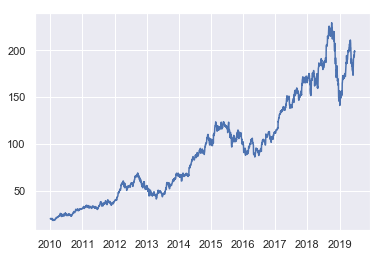

In [ ]:
plt.plot(data)

In [ ]:
data['ema20'] = data.ewm(span=20).mean()
data.head()

,close,ema20
Date,,
2009-12-31,20.00,20.000000
2010-01-04,20.31,20.162750
2010-01-05,20.34,20.227835
2010-01-06,20.02,20.167836
2010-01-07,19.98,20.122400


In [ ]:
data['_std']=  data.close.ewm(span=20).std()
data.dropna(inplace=True)

In [ ]:
data['up_bol'] = data.ema20 + 1.0 * data._std
data['low_bol'] = data.ema20 - 1.0 * data._std
data.head()

,close,ema20,std,_std,up_bol,low_bol
Date,,,,,,
2010-01-05,20.34,20.227835,0.183877,0.021213,20.249048,20.206622
2010-01-06,20.02,20.167836,0.182405,0.181399,20.349235,19.986437
2010-01-07,19.98,20.122400,0.178311,0.189237,20.311637,19.933164
2010-01-08,20.12,20.121894,0.155258,0.160091,20.281985,19.961803
2010-01-11,19.94,20.087502,0.158043,0.165673,20.253176,19.921829


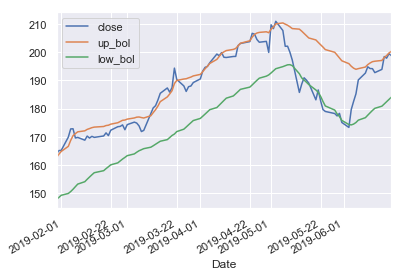

In [ ]:
df = data[['close', 'up_bol', 'low_bol']]
df.iloc[-100:].plot()

In [ ]:
print(np.sum(df.close >=  df.low_bol),',', np.sum(df.close <= df.low_bol))

2121 , 261


### Homework

- Can you describe 'meta labeling' with the plain vanilla Korean or English (undergraduate econ/finance level)?
   - Why does it related to confusion matrix?     
   - How to connect the meta labeling with AI? Does it helpful? If so, on what aspects?
<br>

- Regarding on exercise 3.5
   - (recommend)doing empirical works are not __required__, but if do so, it will be counted as extra credits for you final grade and a decisive factor on many things....
       - if doing, what kind of erratic things or flaws encountered while doing empirics with the Korean data?
   - (required)
       - Please interpret Figure 3.1's punch-line and how do they related to meta labeling?
       - Why does the change in labeling of [-1, 0, 1] into [0,1] do matter? (See SNIPPET 3.7)
       - what is ptSl = [0, 2]? Is it reasonable strategy with `numDays=1`
       - Suppose you are doing empirics: What's your guess the 3.5 (d) answer with reasonable explanation or intuition?